In [1]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

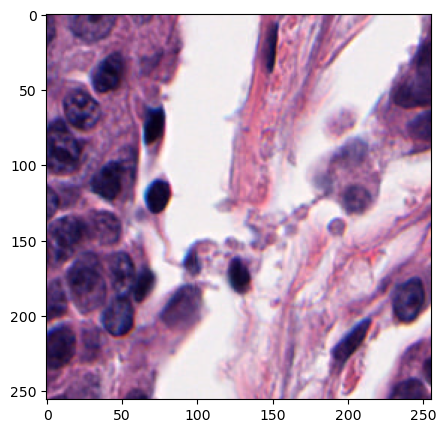

In [2]:
img = np.array(Image.open("nucleiseg.png"))
plt.figure(figsize=(5,5))
plt.imshow(img)

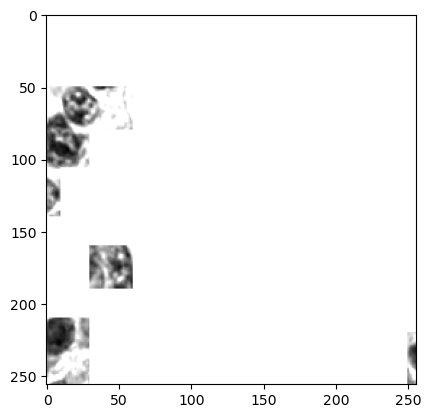

In [3]:
gray_img =  0.3 * img[:,:,0] + 0.6 *img[:,:,1] + 0.11*img[:,:,2]
gray_img[:,60:250] = 255*np.ones((gray_img.shape[0],250-60))
gray_img[140:210,0:30] = 255*np.ones((210-140,30))
gray_img[0:50,0:60] = 255*np.ones((50,60))
gray_img[80:160,30:60] = 255*np.ones((160-80,30))
gray_img[190:256,30:60] = 255*np.ones((256-190,30))
gray_img[0:220,250:256] = 255*np.ones((220,6))
gray_img[106:140,10:30] = 255 * np.ones((140-106,20))
brightness = 10
contrast = 2.3
gray_img = cv2.addWeighted(np.uint8(gray_img),contrast,np.uint8(np.zeros(gray_img.shape, gray_img.dtype)), 0, brightness) 
plt.imshow(gray_img,cmap='gray')

In [11]:
output = np.array(Image.open("nucleiseg_mask.png"))

In [12]:
def PSNR(img1,img2):
    return np.sum(np.power(img1 - img2,2)) / (img1.shape[0]* img1.shape[1])

In [13]:
def SSIM(img1,img2,c1,c2):
    Var = np.cov(img1.flatten(),img2.flatten())
    return (((2*img1.mean() * img2.mean())  + c1) * (2 * Var[0][1] + c2)) / ((img1.mean()**2 + img2.mean()**2 + c1) * (Var[0][0]**2 + Var[1][1]**2 + c2)) 

In [14]:
PSNR(output,gray_img)

7.7234039306640625

In [16]:
SSIM(output,gray_img,(0.01 * 256)**2 ,(0.03 * 256)**2 )

-2.6486917117359087e-05

### Extracting All Nuclei

In [17]:
gray_img1 =  0.3 * img[:,:,0] + 0.6 *img[:,:,1] + 0.11*img[:,:,2]

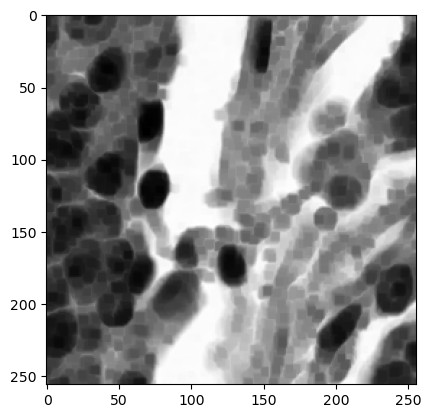

In [18]:
gray_img1 = cv2.erode(gray_img1,np.ones((5,5)))
plt.imshow(gray_img1,cmap='gray')

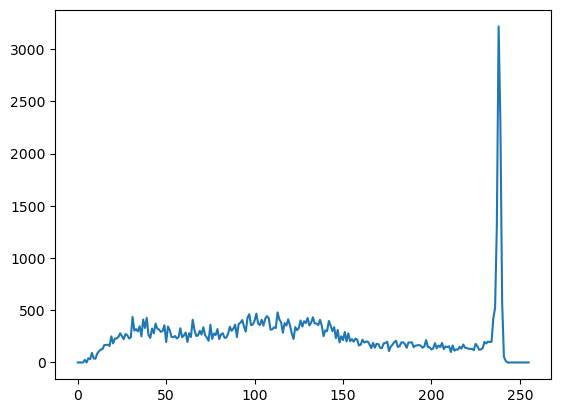

In [19]:
hist = cv2.calcHist([np.uint8(gray_img1)],[0],mask = None,histSize=[256],ranges=[0,256])
plt.plot(hist)

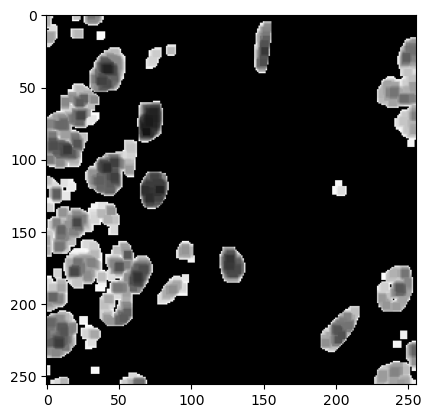

In [20]:
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
mask = (np.uint8(gray_img1) <=60)
IMG = cv2.filter2D(mask * gray_img,-1,kernel)
plt.imshow(mask * gray_img1,cmap='gray')
IMG = mask * gray_img1

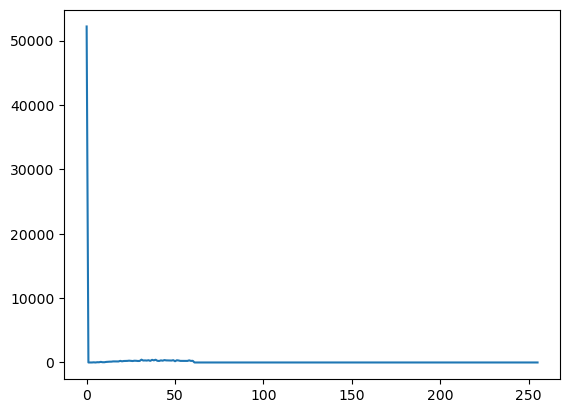

In [21]:
hist = cv2.calcHist([np.uint8(IMG)],[0],mask = None,histSize=[256],ranges=[0,256])
plt.plot(hist)

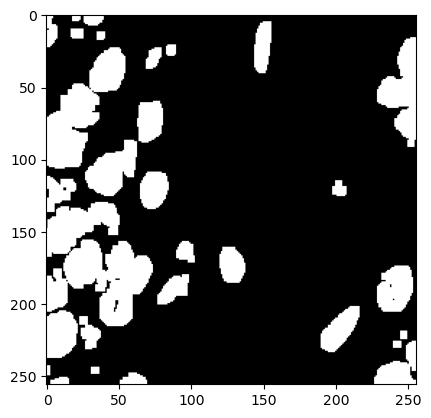

In [38]:
out = 255 * (IMG>0)
out = cv2.morphologyEx(np.uint8(out),cv2.MORPH_OPEN,np.ones((5,5),np.uint8),iterations=1)
plt.imshow(out,cmap='gray')